In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy 
import PIL 
import requests

np.random.seed(613)

In [2]:
# load dataset from seaborn 
tips = sns.load_dataset("tips")
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


<Axes: xlabel='total_bill', ylabel='tip'>

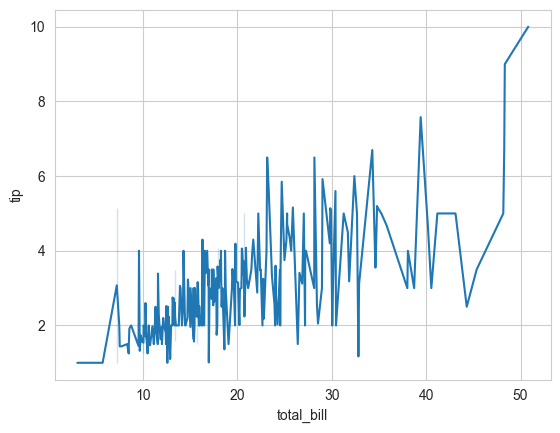

In [3]:
sns.set_style('whitegrid') #change style to whitegrid 

sns.lineplot(data=tips, #choose our dataset
             x = 'total_bill', #define our x vairable
             y= 'tip') #define our y variable

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

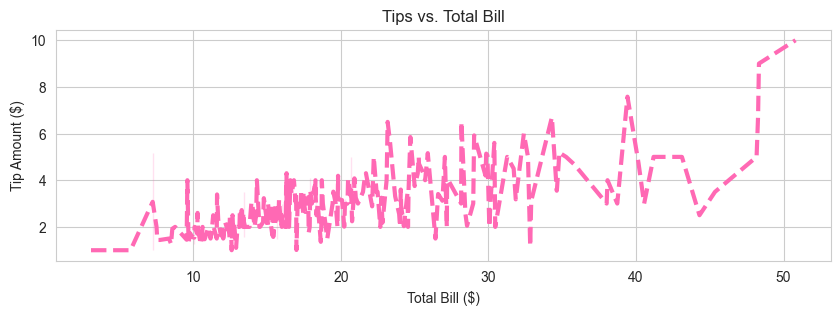

In [ ]:
fig = plt.subplots(figsize=(10,3))

# create the line plot
tipgraph = sns.lineplot(data=tips,
                        x ='total_bill',
                        y ='tip',
                        color = 'hotpink',
                        linestyle = '--',
                        linewidth = 3,
                        markers = 'o',
                        markerfacecolor = 'indigo')
tipgraph.set(title = 'Tips vs. Total Bill',
             xlabel = 'Total Bill ($)',
             ylabel = 'Tip Amount ($)')

[Text(0.5, 1.0, 'Tips vs. Total Bill'),
 Text(0.5, 0, 'Total Bill ($)'),
 Text(0, 0.5, 'Tip Amount ($)')]

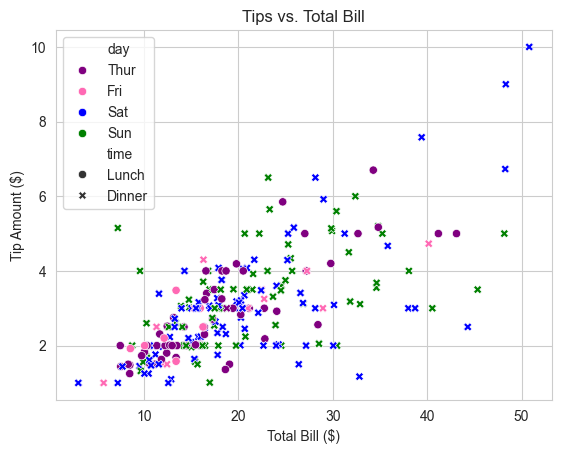

In [ ]:
# create the scatterplot
tipgraph = sns.scatterplot(data=tips,
                        x ='total_bill',
                        y ='tip',
                        style = 'time', #change style markers to time variable
                        hue = 'day',
                        palette = ['purple', 'hotpink', 'blue', 'green'])
tipgraph.set(title = 'Tips vs. Total Bill',
             xlabel = 'Total Bill ($)',
             ylabel = 'Tip Amount ($)')

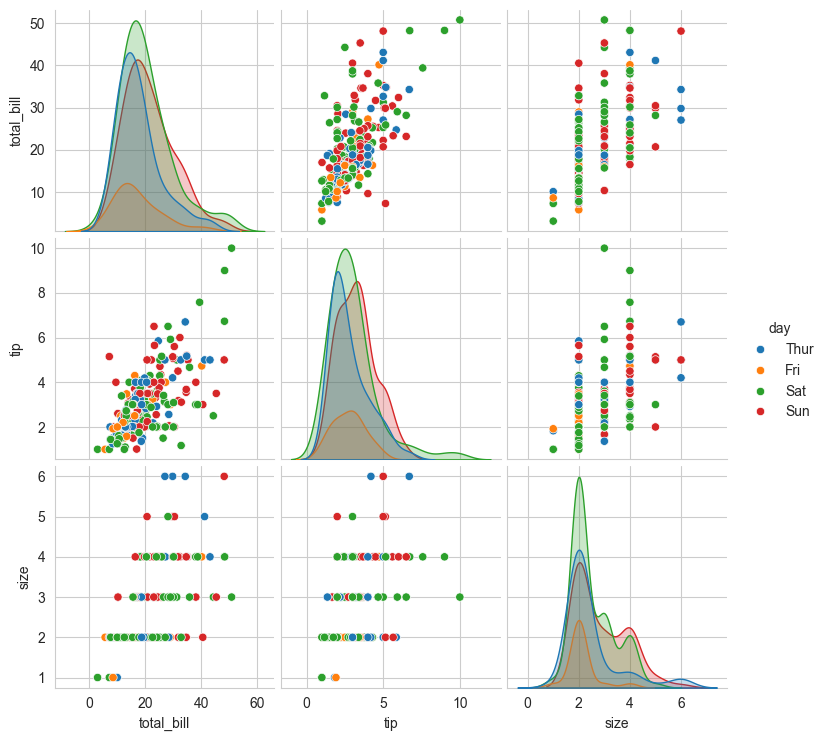

In [6]:
# create pairplot, color specified by day 
sns.pairplot(data = tips, hue = 'day')

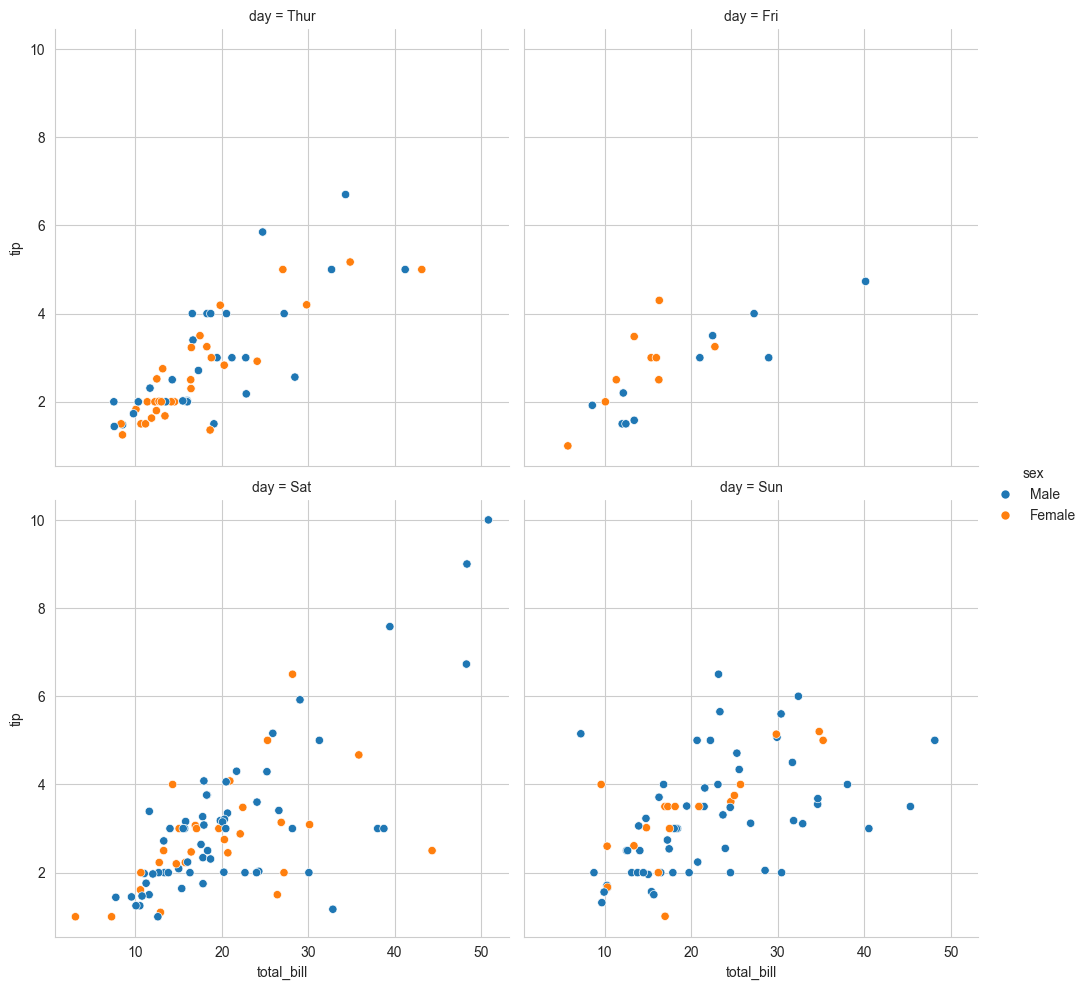

In [7]:
daysplot = sns.relplot(data = tips, 
    x = 'total_bill',
    y = 'tip',
    hue = 'sex', # color according to sex variable 
    col = 'day', # create subplots 
    kind = 'scatter', # use scatterplot
    col_wrap = 2) # set graphs into 2 columns
daysplot

In [8]:
import plotly.graph_objects as go # go is graph objects
import nbformat 

x1 = np.array(["Luffy", "Zoro", "Nami", "Usopp", "Sanji"])
y1 = np. array([110, 180, 20, 99, 220])

In [9]:
#add interactive features
graph = go.Figure()

graph.add_trace(go.Bar(x=x1, y=y1))
graph.update_layout(title = "Pirate Scores",
                    xaxis_title = "Pirates",
                    yaxis_title = "Score")
graph.show()

In [11]:
# save plotly graphs as HTML files 
# graph.write_html()
# graph

In [ ]:
graph = go.Figure()

# create the interactive scatterplot
graph.add_trace(go.Scatter(x = x1,
                           y = y1,
                           mode = 'markers',
                           marker = dict(size = 15, 
                                         color = 'hotpink',
                                         opacity = 1,
                                         line = dict(width = 5, color = 'purple'))))
graph.update_layout(title = "Interactive Pirate Plot",
                    xaxis_title = "Pirates",
                    yaxis_title = "Scores",
                    width = 500,
                    height = 500) 
                           

In [ ]:
from wordcloud import WordCloud 

df = pd.read_csv("https://raw.githubusercontent.com/prasertcbs/basic-dataset/master/movie_quotes.csv",
                 on_bad_lines = 'skip')
df

,quote,movie,type,year
0,"Do, or do not. There is no try.",Star Wars: Episode V - The Empire Strikes Back,movie,1890
1,Listen to them. Children of the night. What mu...,Dracula,movie,1931
2,It's alive! It's alive!,Frankenstein,movie,1931
3,"Oh, no, it wasn't the airplanes. It was Beauty...",King Kong,movie,1933
4,"Magic Mirror on the wall, who is the fairest o...",Snow White and the Seven Dwarves,movie,1937
...,...,...,...,...
727,I didn't know if you were lost. Stick with me....,Us,movie,2019
728,This guy's awesome! He's holding his own while...,Dragon Ball Super: Broly,movie,2019
729,"Murder is murder, it don’t matter who you are.",Black and Blue,movie,2019
730,You know what a lion is? A lion is a strong an...,Between Two Ferns: The Movie,movie,2019


(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

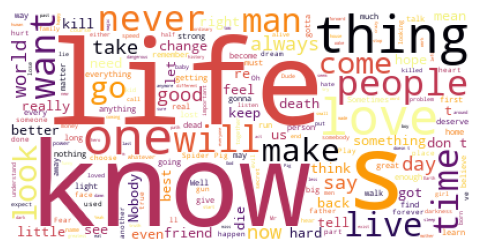

In [ ]:
text = " ".join(each for each in df.quote)

# create wordcloud 
wordcloud = WordCloud(background_color = 'white',
                      colormap = 'inferno',
                      random_state = 613).generate(text)

fig, ax = plt.subplots(figsize = (7,3))
ax.imshow(wordcloud)
ax.axis("off")

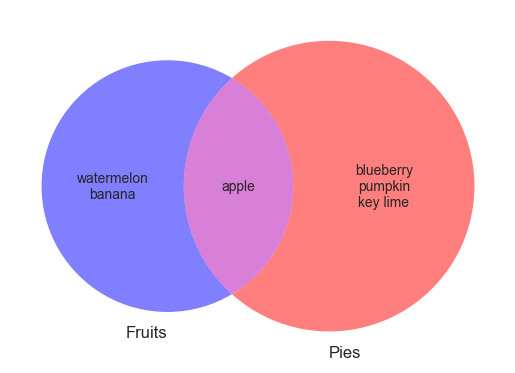

In [12]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted 

A = set(["apple", "banana", "watermelon"])
B = set(["pumpkin", "blueberry", "apple", "key lime"])

# create venn diagram
diagram = venn2([A, B],
                set_labels = ("Fruits", "Pies"),
                set_colors = ('blue', 'red'),
                alpha = 0.5)

diagram.get_label_by_id("10").set_text("\n".join(A-B)) #left - 1, right - 0
diagram.get_label_by_id("11").set_text("\n".join(A & B)) # middle 1, 1
diagram.get_label_by_id("01").set_text("\n".join(B - A)) # left - 0, right - 1